In [1]:
import scanpy as sc

In [16]:
adata = sc.read_h5ad("../data/post_adata_annotated.h5ad")

In [17]:
cell_types_to_keep = ['DP (Sig.)', 'Immature\n CD8', 'Mature\n CD8']
adata = adata[adata.obs['annotations'].isin(cell_types_to_keep)].copy()

In [18]:
replacement_map = {
    'DP (Sig.)': 'DP'
}
adata.obs['annotations'] = adata.obs['annotations'].replace(replacement_map)

/tmp/ipykernel_2215832/3471350743.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['annotations'] = adata.obs['annotations'].replace(replacement_map)


In [19]:
adata.obs['cell_type'] = adata.obs['annotations']
del adata.obs['annotations']

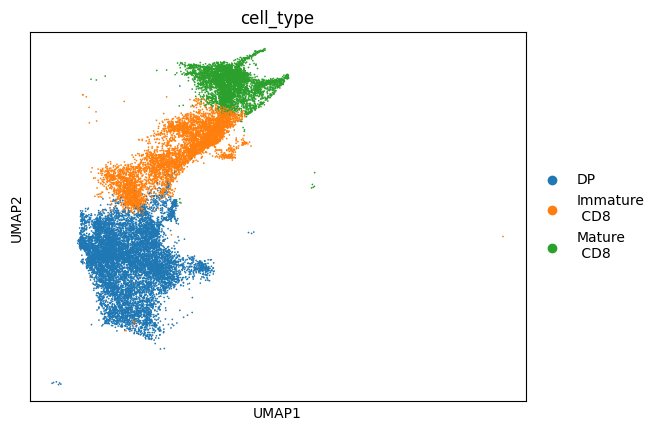

In [20]:
sc.pl.umap(adata, color = 'cell_type')

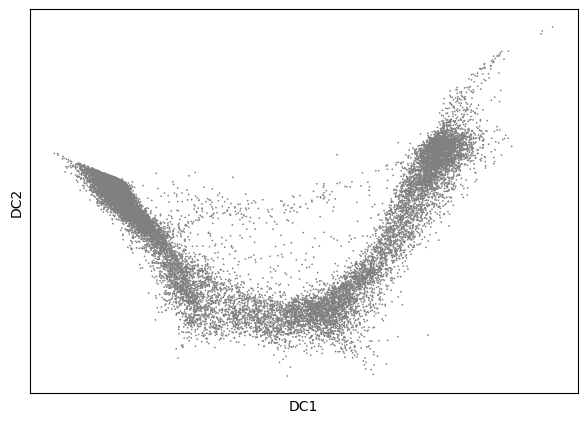

In [21]:
sc.tl.diffmap(adata)
sc.pl.scatter(adata, basis="diffmap")

In [22]:
adata.obsm["X_diffmap"][:, 1].argmin()

6880

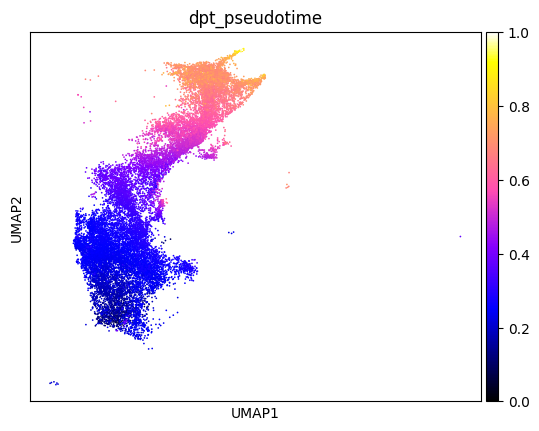

In [23]:
adata.uns['iroot'] = 6880
sc.tl.dpt(adata)
sc.pl.umap(adata, color="dpt_pseudotime", color_map="gnuplot2")

In [24]:
sorted_indices = adata.obs['dpt_pseudotime'].argsort()
adata = adata[sorted_indices].copy()

In [25]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, flavor = 'seurat_v3')
adata = adata[:, adata.var.highly_variable].copy()

In [26]:
adata

AnnData object with n_obs × n_vars = 19744 × 2000
    obs: 'batch_indices', 'percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins', 'batch', 'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0', 'leiden_totalVI_res0.6', 'ADT_CD102_A0104_fore_prob', 'ADT_CD102_A0104', 'ADT_CD103_A0201_fore_prob', 'ADT_CD103_A0201', 'ADT_CD106_A0226_fore_prob', 'ADT_CD106_A0226', 'ADT_CD115(CSF-1R)_A0105_fore_prob', 'ADT_CD115(CSF-1R)_A0105', 'ADT_CD117(c-Kit)_A0012_fore_prob', 'ADT_CD117(c-Kit)_A0012', 'ADT_CD11a_A0595_fore_prob', 'ADT_CD11a_A0595', 'ADT_CD11c_A0106_fore_prob', 'ADT_CD11c_A0106', 'ADT_CD122(IL-2Rb)_A0227_fore_prob', 'ADT_CD122(IL-2Rb)_A0227', 'ADT_CD127(IL-7Ra)_A0198_fore_prob', 'ADT_CD127(IL-7Ra)_A0198', 'ADT_CD134(OX-40)_A0195_fore_prob', 'ADT_CD134(OX-40)_A0195', 'ADT_CD135_A0098_fore_prob', 'ADT_CD135_A0098', 'ADT_CD137_A0194_fore_prob', 'ADT_CD137_A0194', 'ADT_CD140a_A0573_fore_prob', 'ADT_CD140a_A0573', 'ADT_CD14_A0424_fore_prob', 'ADT_CD14_A0424', 'ADT_CD15(SSEA-1)_A

In [28]:
adata.write('../data/thymocyte.h5ad')